# Regression Wavelet Forest:

In regression wavelet forest, training data is passed through a tree where every node has a small neural network that returns a probability that the sample 'belongs' to this node. The probability at each level is a multlipication of the node on that level and the nodes leading to this level: <br><br>
$\mu_l(x_i) = \Pi_m\mu_m(x_i)$
<br><br>
The valule in each node is determined by a 'vote' of the samples:
<br><br>
$\hat{y}=\sum_i\mu_l(x_i)y_i$

The prediction value is then determined by a 'vote' of the nodes: <br><br>
$\tilde{y_i} = \sum_l\mu_l(x_i)\hat{y}_l$

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from func_gen import *
import sklearn
import torch
from params import parameters
import model_conf
import dataset_loader
import trainer
import matplotlib.pyplot as plt
import numpy as np

conf = parameters()
conf.epochs = 110
conf.one_batch = True
x,y = step_gen(range = (0,100),step=0.1)
tdl,vdl = dl_maker(x,y,conf)
data = dataset_loader.DataBunch(tdl,vdl,c=1,features4tree=1)
device = torch.device('cuda',0)
torch.cuda.set_device(device)
run = trainer.Runner(cb_funcs=conf.cbfs)
loss_func =  torch.nn.MSELoss()

xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
plt.scatter(xx, yy, marker='^')

for i in range(2,7):
    conf.tree_depth = 2*i
    learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)
    run.fit(conf.epochs, learn)
    zz = run.recorder.tot_pred.cpu().numpy()
    plt.scatter(xx, zz, marker='*')

plt.show()


KeyboardInterrupt: 

In [3]:
from func_gen import *
import sklearn
import torch
from params import parameters
import model_conf
import dataset_loader
import trainer

conf = parameters()
conf.epochs = 100
conf.tree_depth = 15
conf.one_batch = True
x,y = step_gen(range = (0,100),step=0.1)
tdl,vdl = dl_maker(x,y,conf)
data = dataset_loader.DataBunch(tdl,vdl,c=1,features4tree=1)

loss_func =  torch.nn.MSELoss()

learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)

device = torch.device('cuda',0)
torch.cuda.set_device(device)

run = trainer.Runner(cb_funcs=conf.cbfs)
run.fit(conf.epochs, learn)

train: [0.4630326456098414, tensor(0.4630, device='cuda:0')]
valid: [0.4918162952769886, tensor(0.4918, device='cuda:0')]
train: [0.46274313855527055, tensor(0.4627, device='cuda:0')]
valid: [0.4916487722685843, tensor(0.4916, device='cuda:0')]
train: [0.4623966501719916, tensor(0.4624, device='cuda:0')]
valid: [0.49145586418383047, tensor(0.4915, device='cuda:0')]
train: [0.4619690396892491, tensor(0.4620, device='cuda:0')]
valid: [0.4912329933860085, tensor(0.4912, device='cuda:0')]
train: [0.4614756114447295, tensor(0.4615, device='cuda:0')]
valid: [0.4909806222626657, tensor(0.4910, device='cuda:0')]
train: [0.4608865766382929, tensor(0.4609, device='cuda:0')]
valid: [0.49068783846768466, tensor(0.4907, device='cuda:0')]
train: [0.46013953365496735, tensor(0.4601, device='cuda:0')]
valid: [0.49033536044034093, tensor(0.4903, device='cuda:0')]
train: [0.4592537951113573, tensor(0.4593, device='cuda:0')]
valid: [0.4899241591944839, tensor(0.4899, device='cuda:0')]
train: [0.458265071

train: [0.3435935860249534, tensor(0.3436, device='cuda:0')]
valid: [0.3606477910822088, tensor(0.3606, device='cuda:0')]
train: [0.3424480836782883, tensor(0.3424, device='cuda:0')]
valid: [0.35821963223544034, tensor(0.3582, device='cuda:0')]
train: [0.3409764531833022, tensor(0.3410, device='cuda:0')]
valid: [0.3559842889959162, tensor(0.3560, device='cuda:0')]
train: [0.3394276177705224, tensor(0.3394, device='cuda:0')]
valid: [0.35337251605409564, tensor(0.3534, device='cuda:0')]
train: [0.3377890971169543, tensor(0.3378, device='cuda:0')]
valid: [0.35084984519264917, tensor(0.3508, device='cuda:0')]
train: [0.33619118306174206, tensor(0.3362, device='cuda:0')]
valid: [0.34862617723869554, tensor(0.3486, device='cuda:0')]
train: [0.33470768715018656, tensor(0.3347, device='cuda:0')]
valid: [0.34676203872218275, tensor(0.3468, device='cuda:0')]
train: [0.333316381653743, tensor(0.3333, device='cuda:0')]
valid: [0.3451578544847893, tensor(0.3452, device='cuda:0')]
train: [0.33184179

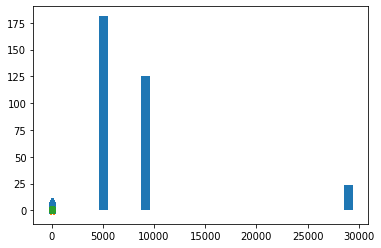

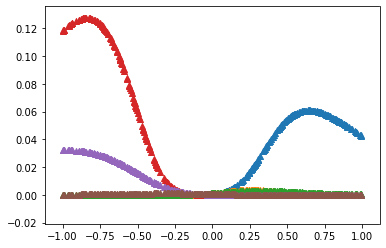

In [8]:
import matplotlib.pyplot as plt
mu = run.mu
y_hat = run.y_hat
arg_mu = torch.argmax(mu, dim=1).cpu().numpy()
uni_mu = np.unique(arg_mu)
yh = y_hat[arg_mu].detach().cpu().numpy()
yh_orig = y_hat.detach().cpu().numpy()
plt.hist(arg_mu,bins=30)

uni_mu_dist = mu[:,uni_mu].cpu().numpy()

xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()

plt.scatter(xx, yh, marker='^')
plt.scatter(xx, yy, marker='*')
plt.scatter(xx, zz, marker='o')
plt.show()

for i in range(6):
    plt.scatter(xx, uni_mu_dist.T[i], marker='^')

plt.show()

### Loss vs. No. of batch iterations:

In [ ]:
run.recorder.plot_loss()

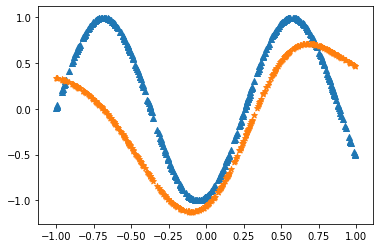

In [60]:
import matplotlib.pyplot as plt
import numpy as np

xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()

plt.scatter(xx, yy, marker='^')
plt.scatter(xx, zz, marker='*')

plt.show()

In [53]:
conf.epochs = 100
conf.one_batch = False
tdl,vdl = dl_maker(x,y,conf)
data = dataset_loader.DataBunch(tdl,vdl,c=1,features4tree=1)

loss_func =  torch.nn.MSELoss()

learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)

device = torch.device('cuda',0)
torch.cuda.set_device(device)

run = trainer.Runner(cb_funcs=conf.cbfs)
run.fit(conf.epochs, learn)

train: [0.45598941632171175, tensor(0.4560, device='cuda:0')]
valid: [0.4863468516956676, tensor(0.4863, device='cuda:0')]
train: [0.4453751749067164, tensor(0.4454, device='cuda:0')]
valid: [0.478186728737571, tensor(0.4782, device='cuda:0')]
train: [0.418210157707556, tensor(0.4182, device='cuda:0')]
valid: [0.45057553378018467, tensor(0.4506, device='cuda:0')]
train: [0.38558021659281716, tensor(0.3856, device='cuda:0')]
valid: [0.4194958311138731, tensor(0.4195, device='cuda:0')]
train: [0.3758032044368004, tensor(0.3758, device='cuda:0')]
valid: [0.4151615027225379, tensor(0.4152, device='cuda:0')]
train: [0.3605210489301539, tensor(0.3605, device='cuda:0')]
valid: [0.40237644079959756, tensor(0.4024, device='cuda:0')]
train: [0.3472664676495452, tensor(0.3473, device='cuda:0')]
valid: [0.38101924549449573, tensor(0.3810, device='cuda:0')]
train: [0.3343992546423158, tensor(0.3344, device='cuda:0')]
valid: [0.3744668902772846, tensor(0.3745, device='cuda:0')]
train: [0.31762105457

train: [0.06272491910564365, tensor(0.0627, device='cuda:0')]
valid: [0.22360775109493372, tensor(0.2236, device='cuda:0')]
train: [0.062006235834377914, tensor(0.0620, device='cuda:0')]
valid: [0.22350600271513968, tensor(0.2235, device='cuda:0')]
train: [0.06131365192470266, tensor(0.0613, device='cuda:0')]
valid: [0.2201996543190696, tensor(0.2202, device='cuda:0')]
train: [0.06065108455828766, tensor(0.0607, device='cuda:0')]
valid: [0.22258134321732956, tensor(0.2226, device='cuda:0')]
train: [0.060021084458080694, tensor(0.0600, device='cuda:0')]
valid: [0.22467521898674242, tensor(0.2247, device='cuda:0')]
train: [0.059424716323169306, tensor(0.0594, device='cuda:0')]
valid: [0.22025655110677084, tensor(0.2203, device='cuda:0')]
train: [0.058861991540709535, tensor(0.0589, device='cuda:0')]
valid: [0.21965193314985795, tensor(0.2197, device='cuda:0')]
train: [0.05833195928317397, tensor(0.0583, device='cuda:0')]
valid: [0.22421160611239346, tensor(0.2242, device='cuda:0')]
train

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

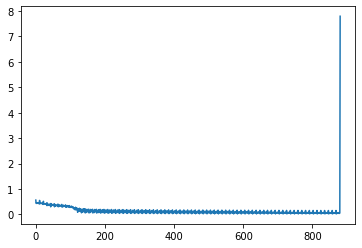

In [54]:
run.recorder.plot_loss()

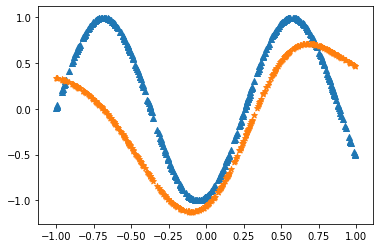

In [61]:
import matplotlib.pyplot as plt
import numpy as np

xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()

plt.scatter(xx, yy, marker='^')
plt.scatter(xx, zz, marker='*')

plt.show()

### Fitting a sine function over 100 iterations:

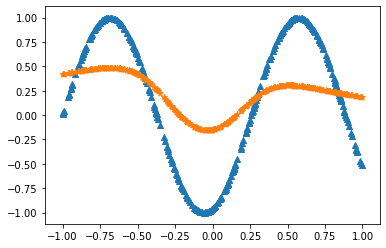

In [5]:
import matplotlib.pyplot as plt
import numpy as np

xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()

plt.scatter(xx, yy, marker='^')
plt.scatter(xx, zz, marker='*')

plt.show()

In [6]:
# conf.epochs = 1000
# run.fit(conf.epochs, learn)

# import matplotlib.pyplot as plt
# import numpy as np

# xx = learn.data.valid_dl.ds.x.numpy()
# yy = learn.data.valid_dl.ds.y.numpy()
# zz = run.recorder.tot_pred.cpu().numpy()

# plt.scatter(xx, yy, marker='^')
# plt.scatter(xx, zz, marker='*')

# plt.show()

In [7]:
conf.epochs = 100

In [80]:
mu = run.mu
y_hat = run.y_hat

In [81]:
arg_mu = torch.argmax(mu, dim=1).cpu().numpy()
uni_mu = np.unique(arg_mu)
arg_mu

array([449, 449, 449, 317, 317, 449, 465, 449, 460, 465, 465, 460, 460,
       460, 449, 465, 449, 449, 317, 465, 449, 449, 449, 317, 465, 449,
       465, 465, 460, 449, 465, 449, 317, 460, 465, 449, 465, 317, 460,
       465, 449, 465, 460, 460, 465, 449, 465, 449, 449, 449, 460, 317,
       465, 449, 317, 317, 465, 449, 465, 317, 465, 465, 465, 465, 465,
       460, 460, 460, 449, 449, 460, 317, 465, 465, 460, 460, 460, 449,
       465, 465, 449, 317, 449, 465, 460, 449, 317, 460, 465, 449, 317,
       465, 449, 449, 465, 465, 460, 465, 449, 317, 317, 449, 449, 460,
       460, 465, 465, 465, 460, 460, 449, 449, 465, 465, 465, 465, 460,
       317, 460, 460, 449, 317, 465, 449, 465, 317, 460, 465, 460, 317,
       465, 317, 449, 460, 465, 465, 465, 465, 449, 460, 449, 465, 460,
       449, 465, 317, 460, 449, 465, 449, 460, 449, 317, 317, 460, 449,
       465, 449, 465, 465, 317, 460, 460, 449, 449, 465, 449, 465, 465,
       449, 460, 460, 465, 449, 449, 465, 317, 465, 460, 449, 46

In [82]:
arg_mu

array([449, 449, 449, 317, 317, 449, 465, 449, 460, 465, 465, 460, 460,
       460, 449, 465, 449, 449, 317, 465, 449, 449, 449, 317, 465, 449,
       465, 465, 460, 449, 465, 449, 317, 460, 465, 449, 465, 317, 460,
       465, 449, 465, 460, 460, 465, 449, 465, 449, 449, 449, 460, 317,
       465, 449, 317, 317, 465, 449, 465, 317, 465, 465, 465, 465, 465,
       460, 460, 460, 449, 449, 460, 317, 465, 465, 460, 460, 460, 449,
       465, 465, 449, 317, 449, 465, 460, 449, 317, 460, 465, 449, 317,
       465, 449, 449, 465, 465, 460, 465, 449, 317, 317, 449, 449, 460,
       460, 465, 465, 465, 460, 460, 449, 449, 465, 465, 465, 465, 460,
       317, 460, 460, 449, 317, 465, 449, 465, 317, 460, 465, 460, 317,
       465, 317, 449, 460, 465, 465, 465, 465, 449, 460, 449, 465, 460,
       449, 465, 317, 460, 449, 465, 449, 460, 449, 317, 317, 460, 449,
       465, 449, 465, 465, 317, 460, 460, 449, 449, 465, 449, 465, 465,
       449, 460, 460, 465, 449, 449, 465, 317, 465, 460, 449, 46

### Distribution of most popular leafs:

(array([ 56.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 105.,   0.,  69., 100.]),
 array([317.        , 321.93333333, 326.86666667, 331.8       ,
        336.73333333, 341.66666667, 346.6       , 351.53333333,
        356.46666667, 361.4       , 366.33333333, 371.26666667,
        376.2       , 381.13333333, 386.06666667, 391.        ,
        395.93333333, 400.86666667, 405.8       , 410.73333333,
        415.66666667, 420.6       , 425.53333333, 430.46666667,
        435.4       , 440.33333333, 445.26666667, 450.2       ,
        455.13333333, 460.06666667, 465.        ]),
 <a list of 30 Patch objects>)

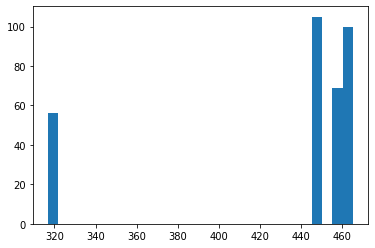

In [83]:
plt.hist(arg_mu,bins=30)

### values of most popular leafs:

In [84]:
yh_orig[uni_mu]

array([0.3474481 , 0.29625118, 0.25946036, 0.23819676], dtype=float32)

In [85]:
yh = y_hat[arg_mu].detach().cpu().numpy()
yh_orig = y_hat.detach().cpu().numpy()

### Value of samples by most popular leaf:

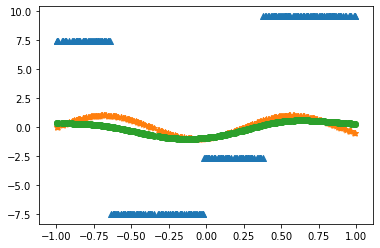

In [86]:
plt.scatter(xx, yh, marker='^')
plt.scatter(xx, yy, marker='*')
plt.scatter(xx, zz, marker='o')
plt.show()

In [ ]:
conf.epochs = 100
conf.tree_depth = 20

learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)

run.fit(conf.epochs, learn)

import matplotlib.pyplot as plt
import numpy as np

xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()

plt.scatter(xx, yy, marker='^')
plt.scatter(xx, zz, marker='*')

plt.show()

In [70]:
uni_mu

array([ 36,  79,  97, 735])

In [71]:
uni_mu_dist = mu[:,uni_mu].cpu().numpy()

In [72]:
uni_mu_dist.T

array([[1.3614635e-04, 4.4938107e-04, 6.3753029e-04, ..., 3.9345294e-02,
        2.2742379e-04, 4.0253937e-02],
       [1.4201674e-03, 4.2415364e-03, 5.7954257e-03, ..., 7.3573671e-02,
        2.2825834e-03, 7.2981514e-02],
       [4.4337209e-02, 6.3788742e-02, 6.9568515e-02, ..., 9.7626857e-03,
        5.2407540e-02, 9.0059442e-03],
       [1.5782682e-09, 1.2851581e-08, 2.4495895e-08, ..., 6.6103972e-04,
        3.8173162e-09, 7.2865875e-04]], dtype=float32)

### Distribution of most popular nodes over all samples:

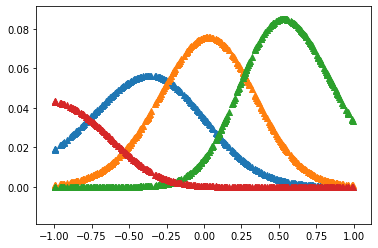

In [73]:
for i in range(4):
    plt.scatter(xx, uni_mu_dist.T[i], marker='^')

plt.show()

In [64]:
mu.size()

torch.Size([330, 64])

In [67]:
len(yh_orig)

64

### Distribution of arbitrary samples over nodes:

ValueError: x and y must be the same size

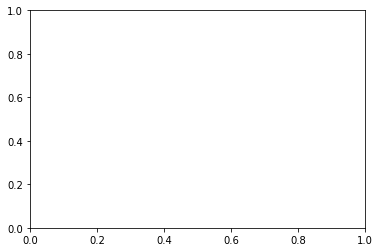

In [74]:
for i in range(10):
    j = i*33
    plt.scatter(j+100*mu[i*33,:].cpu().numpy(),np.arange(0,64), marker='*')

plt.show()

### Value of nodes of arbitrary samples vs. probability:

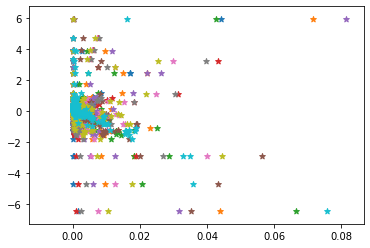

In [75]:
for i in range(10):
    j = i*33
    plt.scatter(mu[i*33,:].cpu().numpy(),yh_orig, marker='*')

plt.show()

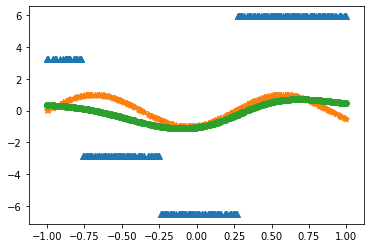

In [76]:
plt.scatter(xx, yh, marker='^')
plt.scatter(xx, yy, marker='*')
plt.scatter(xx, zz, marker='o')
plt.show()